In [4]:
import pandas as pd
import numpy as np 
import seaborn as sns
import statsmodels.formula.api as sm
import statsmodels.api as smf
import scipy.stats as stats
import matplotlib.pyplot as i plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("C:/Users/dell/Documents/delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA and data visualization

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [7]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [9]:
df[df.duplicated()].shape

(0, 2)

In [10]:
df[df.duplicated()]

,Delivery Time,Sorting Time


## Feature engineering

In [11]:
# Renaming columns
df =df.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [12]:
from scipy.stats import skew
print(skew(df.delivery_time))

0.326702631656106


<Axes: >

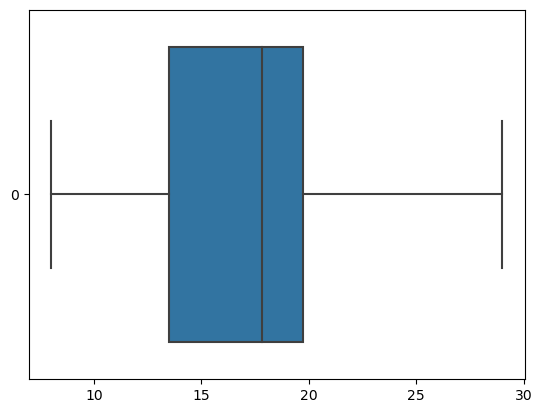

In [13]:
sns.boxplot(df['delivery_time'], orient = 'h')

<Axes: xlabel='delivery_time', ylabel='Density'>

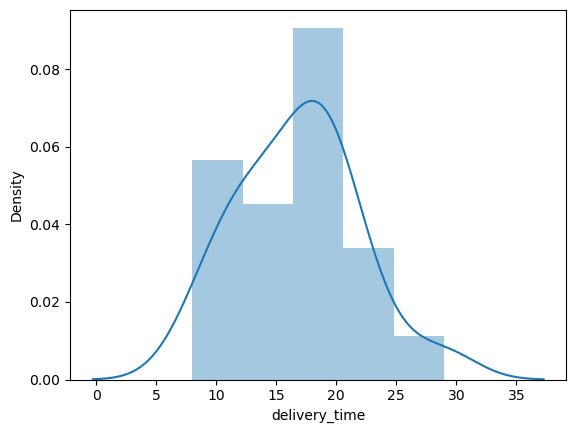

In [14]:
sns.distplot(df['delivery_time'])

In [15]:
print(skew(df.sorting_time))

0.043680994983108075


<Axes: >

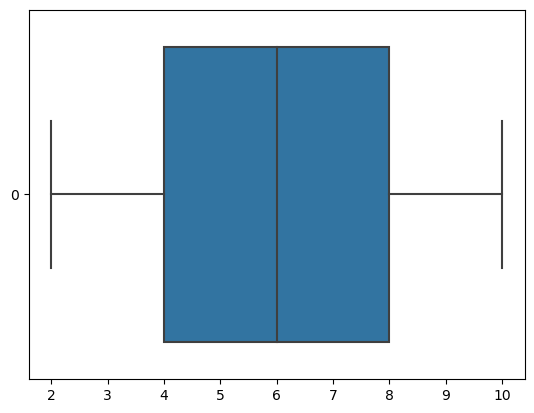

In [16]:
sns.boxplot(df['sorting_time'],orient = 'h')

<Axes: xlabel='sorting_time', ylabel='Density'>

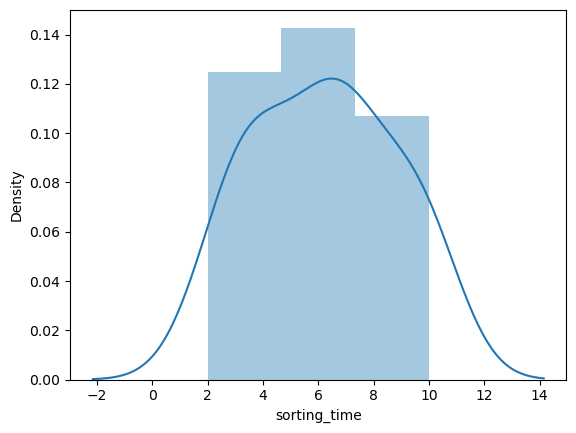

In [17]:
sns.distplot(df['sorting_time'])

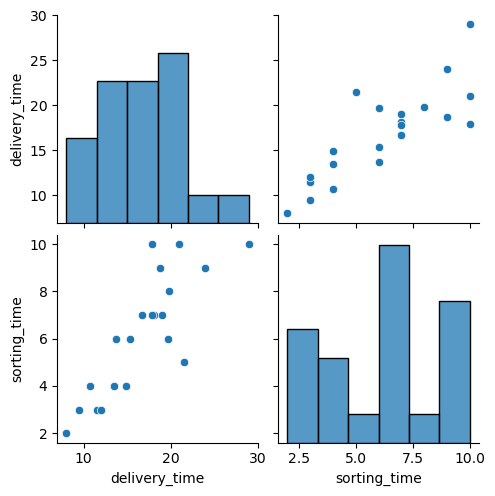

In [18]:
sns.pairplot(df)

In [19]:
df.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<Axes: >

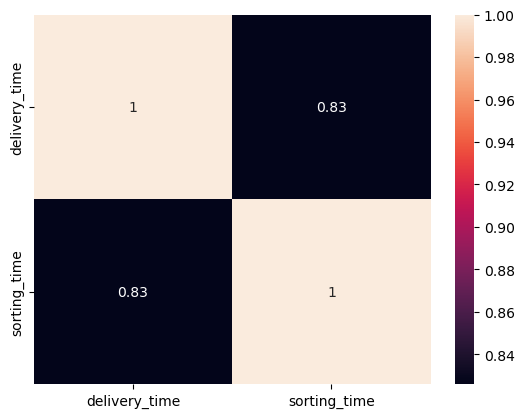

In [20]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

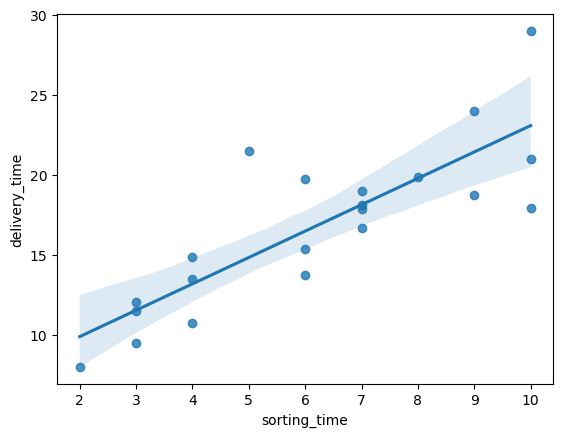

In [21]:
sns.regplot(x=df['sorting_time'],y= df['delivery_time'])

Text(0.5, 1.0, 'Before Transformation')

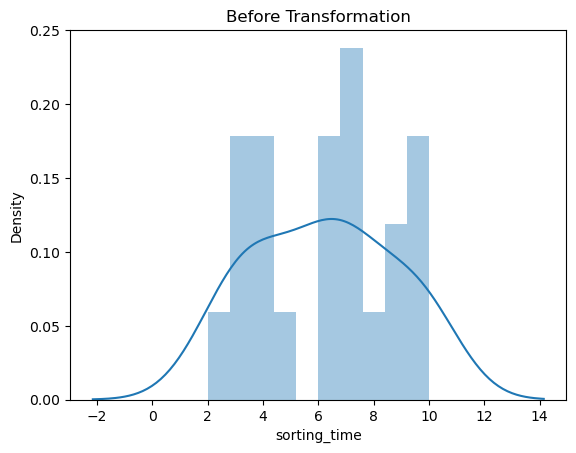

In [25]:
sns.distplot(df['sorting_time'],bins = 10, kde = True)
plt.title('Before Transformation')


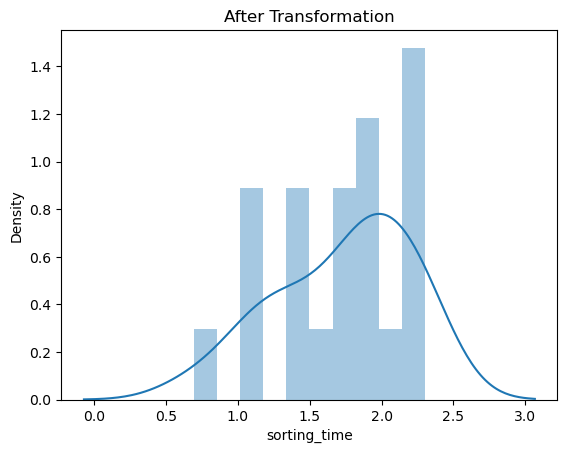

In [26]:
sns.distplot(np.log(df['sorting_time']),bins = 10,kde = True)
plt.title('After Transformation')
plt.show()

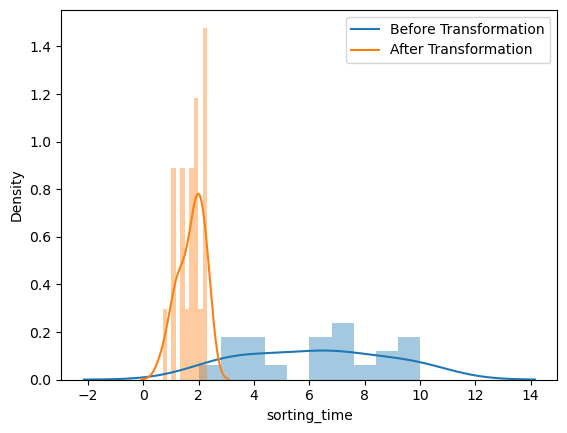

In [28]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['sorting_time'],bins = 10, kde = True)
sns.distplot(np.log(df['sorting_time']),bins = 10,kde = True)
plt.legend(labels)
plt.show()

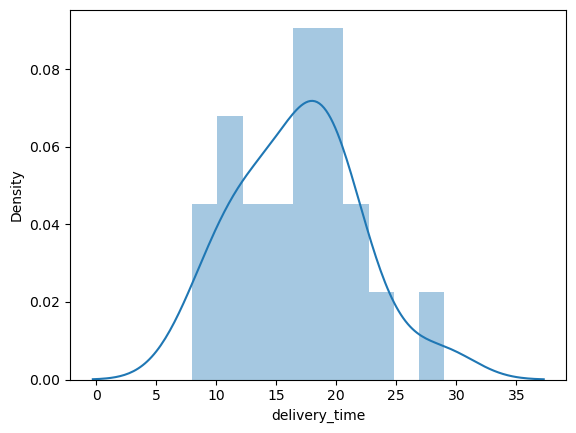

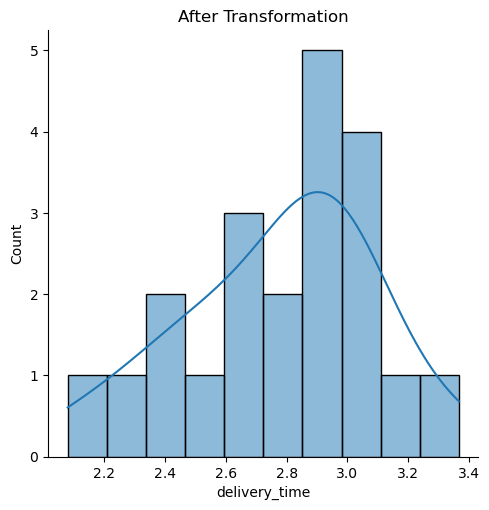

In [29]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['delivery_time'], bins = 10, kde = True)
sns.displot(np.log(df['delivery_time']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

In [33]:
import statsmodels.formula.api as smf

In [34]:
model1 = smf.ols('delivery_time~sorting_time',data = df).fit()

In [35]:
# findingcoefficient parameters
model1.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [36]:
# finding tvalues and pvalues
model1.tvalues, model1.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [37]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 25 Feb 2024   Prob (F-statistic):           3.98e-06
Time:                        21:46:52   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# finding rsquarded values
model1.rsquared , model1.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [39]:
model2 = smf.ols('np.log (delivery_time)~np.log(sorting_time)',data = df).fit()

In [40]:
# findingcoefficient parameters
model2.params

Intercept               1.741987
np.log(sorting_time)    0.597522
dtype: float64

In [41]:
# finding tvalues and pvalues
model2.tvalues, model2.pvalues

(Intercept               13.085552
 np.log(sorting_time)     8.024484
 dtype: float64,
 Intercept               5.921137e-11
 np.log(sorting_time)    1.601539e-07
 dtype: float64)

In [42]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Sun, 25 Feb 2024   Prob (F-statistic):           1.60e-07
Time:                           21:54:54   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# finding rsquarded values
model2.rsquared , model2.rsquared_adj

(0.77216134926874, 0.7601698413355158)

In [44]:
# manual prediction for say sorting time 6
delivery_time = (6.582734) + (1.649020)*(6)
delivery_time

16.476854

In [45]:
# automatic Prediction for say sorting time 6,8
new_df = pd.Series([6,8])
new_df

0    6
1    8
dtype: int64

In [46]:
data_pred = pd.DataFrame(new_df,columns = ['sorting_time'])
data_pred

,sorting_time
0,6
1,8


In [47]:
model1.predict(data_pred)

0    16.476853
1    19.774893
dtype: float64